In [505]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\ModelsDao")

In [506]:
#Importing ModelsDao functions
%run "../ModelsDao/ModelsGeneration.py"

<Figure size 432x288 with 0 Axes>

In [507]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [508]:
dataset = sklearn.datasets.load_boston()

In [509]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [510]:
boston_data = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
target = pd.DataFrame(data=dataset['target'],columns=['Price'])

In [511]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [512]:
target.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [513]:
boston_df = pd.concat([boston_data,target],axis=1)

In [514]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 1. Exploratory Data Analysis

In [515]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [516]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [517]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [518]:
boston_df.shape

(506, 14)

In [519]:
target.describe()

,Price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


###### Mean and media lies close so no such skewness visible.

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

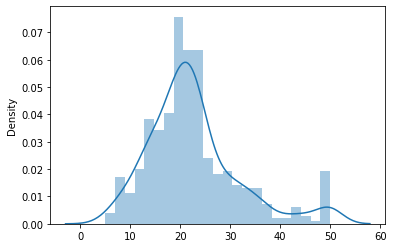

In [520]:
sns.distplot(target)

## 1.a) Data Exploration

In [521]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [522]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


###### It seems few features have skewness

In [523]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

###### Having no null values

In [524]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

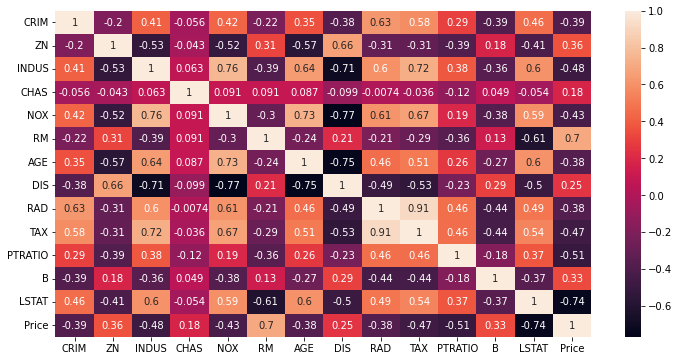

In [525]:
plt.figure(figsize=(12,6))
sns.heatmap(boston_df.corr(),annot=True)

In [526]:
def plot_features(feature):
  sns.distplot(boston_df[feature], kde=True)
  plt.legend([feature])
  plt.title("Distribution of {}".format(feature))
  plt.show()

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


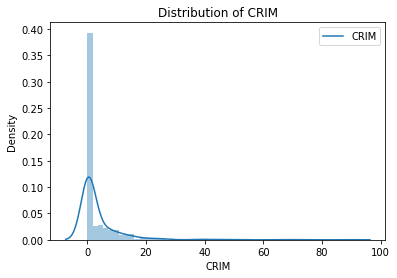

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


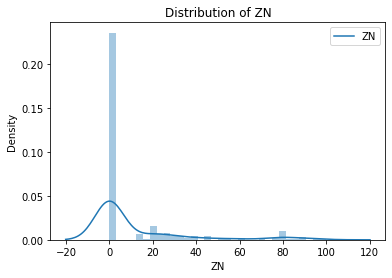

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


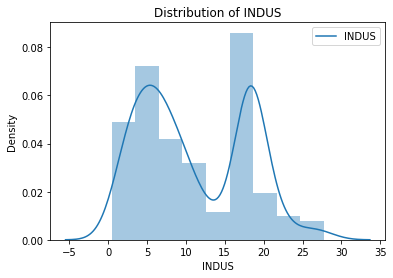

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


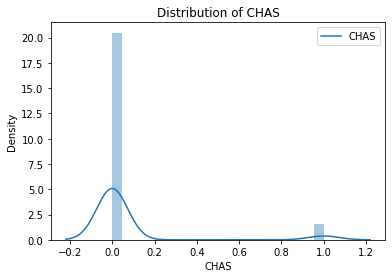

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


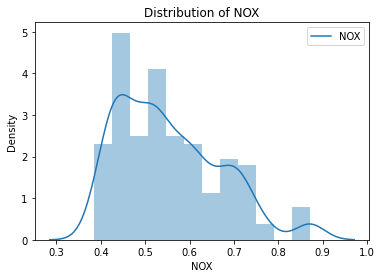

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


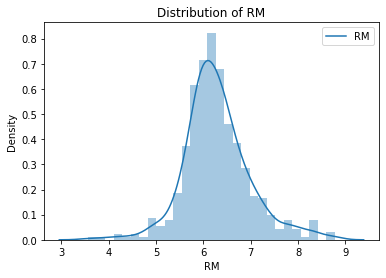

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


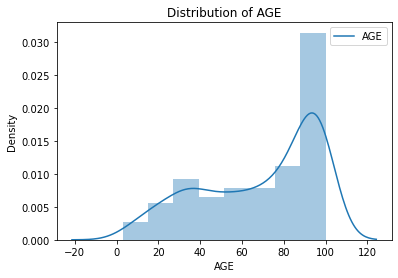

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


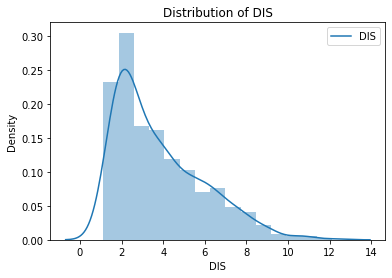

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


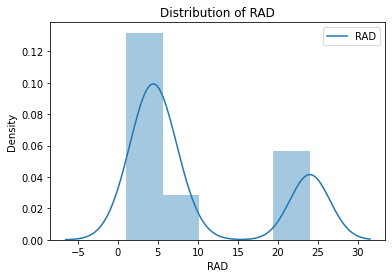

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


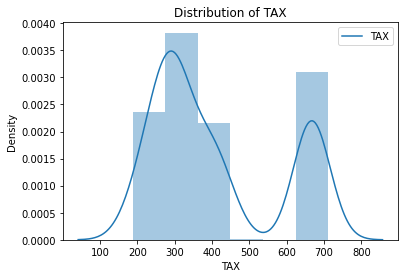

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


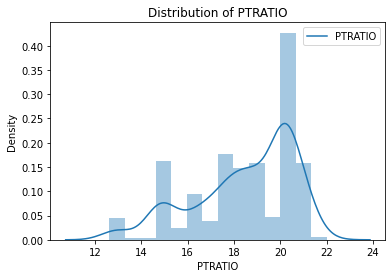

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


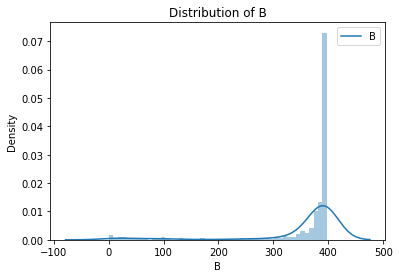

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


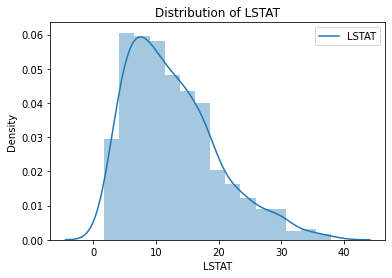

In [527]:
for feature in boston_data.columns:
  plot_features(feature)

In [528]:
features = boston_data.columns

#### Finding Outliers if any

In [529]:
def find_outliers(feature):
  outliers = []
  mean = np.mean(boston_data[feature])
  std = np.std(boston_data[feature])
  q1, q3 = np.percentile(boston_data,[25,75])
  IQR = q3- q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  for data_value in boston_data[feature]:
    point = (data_value-mean)/std

    if feature == 'RM':
      if point > 3*std : 
        outliers.append(data_value)
    else:
      if lower_bound > point > upper_bound :
        outliers.append(data_value)

  print("For the feature {}, there are {} outliers".format(feature,len(outliers)))
  #print("For the feature {}".format(feature))
  #print("Mean: {}".format(mean))
  #print("STD : {}".format(std))
  #print("Number of outliers: {}".format(len(outliers)))
  #print("----------")

In [530]:
for feature in features:
  find_outliers(feature)

For the feature CRIM, there are 0 outliers
For the feature ZN, there are 0 outliers
For the feature INDUS, there are 0 outliers
For the feature CHAS, there are 0 outliers
For the feature NOX, there are 0 outliers
For the feature RM, there are 22 outliers
For the feature AGE, there are 0 outliers
For the feature DIS, there are 0 outliers
For the feature RAD, there are 0 outliers
For the feature TAX, there are 0 outliers
For the feature PTRATIO, there are 0 outliers
For the feature B, there are 0 outliers
For the feature LSTAT, there are 0 outliers


#### Conclusion 
##### 1.) There are no null values in data. 
##### 2.) We can see that following features are not normal distributed : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B'].
##### 3.) RAD and TAX are highly correlated : 0.91
##### 4.) There is some considerable level of correlation between INDUS-NOX (.76), NOX-DIS (.77) and AGE-DIS (.75)
##### 5.) RM has 22 outliers.

## 1.b)Data Cleaning

### 1.b.1) Removing Outliers

In [531]:
#boston_data['RM'].clip(upper = boston_data['RM'].quantile(.80), inplace=True)

In [532]:
#find_outliers('RM')

### 1.b.2) Transforming features using BOX-COX Transformation

In [533]:
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [534]:
features_to_transform = features.drop(['RM'])

In [535]:
features_to_transform

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [536]:
features_to_transform_using_boxcox = features_to_transform.drop(['ZN','CHAS'])

In [537]:
# Since these features has negative values we need to tranform them by first finding the factor by QQ-Plots and then transforming by that factor.
features_to_transform_manually = ['ZN','CHAS']

In [538]:
transformed_boston_data = boston_data.copy()

In [539]:
def transform_features(feature):
  transformed_feature_data , _ = stats.boxcox(transformed_boston_data[feature])
  transformed_boston_data[feature] = transformed_feature_data

In [540]:
for feature in features_to_transform_using_boxcox:
  transform_features(feature)

In [541]:
# Method to find the transformation factor
def box_cox_transformation(feature):
  data = boston_data[feature]
  print("Box-Cox Plot for {}".format(feature))
  for i in [10,20,30,40,50]:
    transformed_data = data**(1/i)
    qqplot(transformed_data,line='s')
    plt.title("For power 1/{}".format(i))

In [542]:
transformed_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-6.843991,18.0,1.008733,0.0,-0.834416,6.575,201.623543,1.264870,0.000000,1.807258,32745.311816,9.053163e+08,1.938257
1,-4.447833,0.0,3.073962,0.0,-1.092408,6.421,260.624267,1.418585,0.660260,1.796577,63253.425063,9.053163e+08,2.876983
2,-4.448936,0.0,3.073962,0.0,-1.092408,7.185,184.738608,1.418585,0.660260,1.796577,63253.425063,8.717663e+08,1.640387
3,-4.194470,0.0,0.926596,0.0,-1.140400,6.998,125.260171,1.571460,1.017528,1.791645,78392.216639,8.864906e+08,1.222396
4,-3.122838,0.0,0.926596,0.0,-1.140400,7.147,157.195622,1.571460,1.017528,1.791645,78392.216639,9.053163e+08,2.036925


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


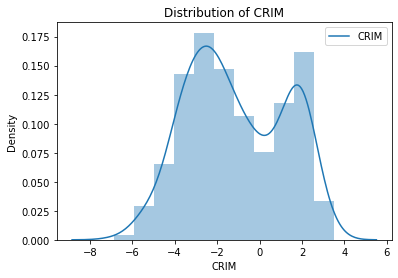

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


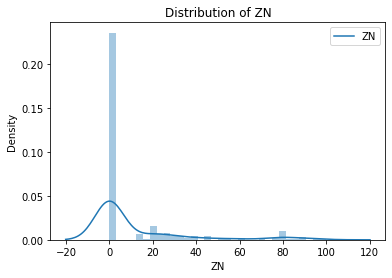

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


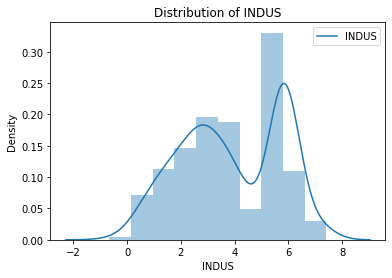

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


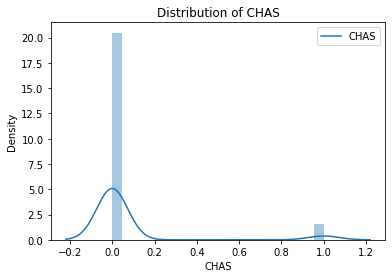

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


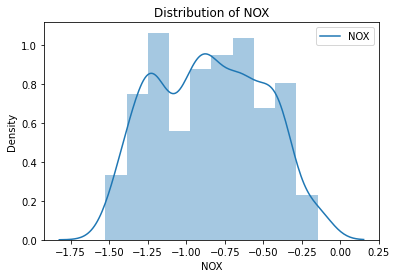

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


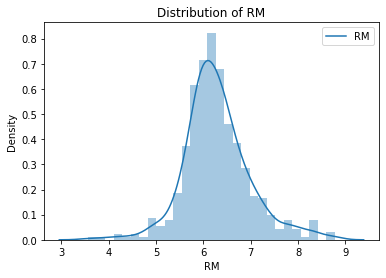

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


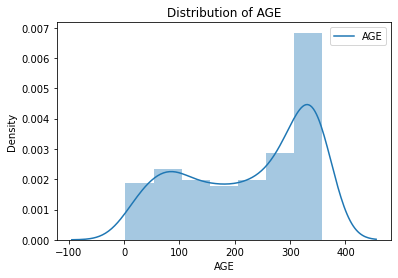

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


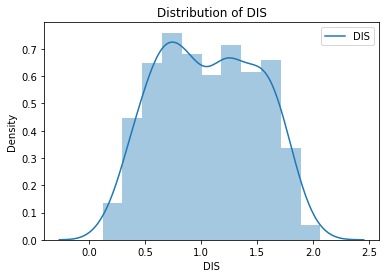

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


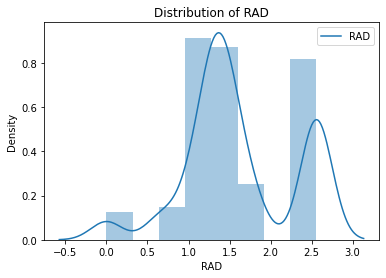

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


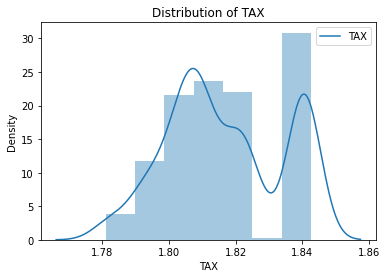

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


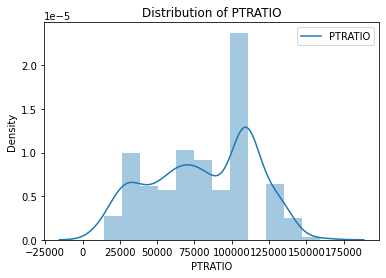

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


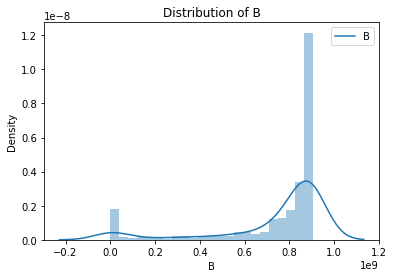

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


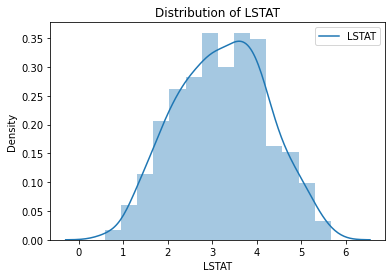

In [543]:
for feature in features:
  sns.distplot(transformed_boston_data[feature], kde=True)
  plt.legend([feature])
  plt.title("Distribution of {}".format(feature))
  plt.show()

#### Scaling Features

In [544]:
s = StandardScaler()
scaled_data = s.fit_transform(boston_data)
transformed_scaled_data = s.fit_transform(transformed_boston_data)


In [545]:
scaled_boston_data = pd.DataFrame(scaled_data, columns=dataset['feature_names'])
transformed_scaled_boston_data = pd.DataFrame(transformed_scaled_data, columns=dataset['feature_names'])

In [546]:
scaled_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [547]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [548]:
transformed_scaled_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-2.495486,0.284830,-1.533636,-0.272599,0.042115,0.413672,-0.208457,0.445390,-2.406060,-0.556196,-1.409886,0.627480,-1.251389
1,-1.454719,-0.487722,-0.432889,-0.272599,-0.703055,0.194274,0.317248,0.789572,-1.413340,-1.175882,-0.517903,0.627480,-0.330207
2,-1.455198,-0.487722,-0.432889,-0.272599,-0.703055,1.282714,-0.358904,0.789572,-1.413340,-1.175882,-0.517903,0.499855,-1.543691
3,-1.344671,-0.487722,-1.577414,-0.272599,-0.841673,1.016303,-0.888866,1.131872,-0.876178,-1.461996,-0.075282,0.555866,-1.953871
4,-0.879209,-0.487722,-1.577414,-0.272599,-0.841673,1.228577,-0.604316,1.131872,-0.876178,-1.461996,-0.075282,0.627480,-1.154565


In [549]:
transformed_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-6.843991,18.0,1.008733,0.0,-0.834416,6.575,201.623543,1.264870,0.000000,1.807258,32745.311816,9.053163e+08,1.938257
1,-4.447833,0.0,3.073962,0.0,-1.092408,6.421,260.624267,1.418585,0.660260,1.796577,63253.425063,9.053163e+08,2.876983
2,-4.448936,0.0,3.073962,0.0,-1.092408,7.185,184.738608,1.418585,0.660260,1.796577,63253.425063,8.717663e+08,1.640387
3,-4.194470,0.0,0.926596,0.0,-1.140400,6.998,125.260171,1.571460,1.017528,1.791645,78392.216639,8.864906e+08,1.222396
4,-3.122838,0.0,0.926596,0.0,-1.140400,7.147,157.195622,1.571460,1.017528,1.791645,78392.216639,9.053163e+08,2.036925


# 2) Model Creation

##### We have 4 type of data sets
##### 1.) Raw Boston Data : boston_data
##### 2.) Transformed Boston Data : transformed_boston_data
##### 3.) Scaled Boston Data : scaled_boston_data
##### 4.) Transformed and Scaled Boston Data : transformed_scaled_boston_data

In [550]:
models_list = []

### 1.) Linear Regression model on Raw Data

In [551]:
X_Raw = np.asarray(boston_data)
y_Raw = target['Price']

In [552]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_Raw, y_Raw, test_size=0.33, random_state=1)

In [553]:
linear_model_raw = buildLinearModel(X_train_raw,y_train_raw)
predictions_raw = linear_model_raw.predict(X_test_raw)
models_list.append((linear_model_raw,"LinearModel on Raw Data",y_test_raw,predictions_raw))

### 2.) Linear Regression model on Transformed Data

In [554]:
X_trans = np.asarray(transformed_boston_data)
y_trans = target['Price']

In [555]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.33, random_state=1)

In [556]:
linear_model_trans = buildLinearModel(X_train_trans,y_train_trans)
predictions_trans = linear_model_trans.predict(X_test_trans)
models_list.append((linear_model_trans,"LinearModel on Transformed Data",y_test_trans,predictions_trans))

### 3.) Linear Regression model on Scaled Data

In [557]:
X_scaled = np.asarray(scaled_boston_data)
y_scaled = target['Price']

In [558]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1)

In [559]:
linear_model_scaled = buildLinearModel(X_train_scaled,y_train_scaled)
predictions_scaled = linear_model_scaled.predict(X_test_scaled)
models_list.append((linear_model_scaled,"LinearModel on Scaled Data",y_test_scaled,predictions_scaled))

### 4.) Linear Regression model on Transformed and Scaled Data

In [560]:
X_transformed_scaled = np.asarray(transformed_scaled_boston_data)
y_transformed_scaled = target['Price']

In [561]:
X_train_trans_scaled, X_test_trans_scaled, y_train_trans_scaled, y_test_trans_scaled = train_test_split(X_transformed_scaled, y_transformed_scaled, test_size=0.33, random_state=1)

In [562]:
linear_model_trans_scaled = buildLinearModel(X_train_trans_scaled,y_train_trans_scaled)
predictions_trans_scaled = linear_model_trans_scaled.predict(X_test_trans_scaled)
models_list.append((linear_model_trans_scaled,"LinearModel on Transformed and Scaled Data",y_test_trans_scaled,predictions_trans_scaled))

### 3.) Model Evaluation

In [563]:
def see_model_performance(model,model_name,y_test,prediction):
  print("For {}".format(model_name))
  print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,prediction))
  print("Mean Squared Error: ", metrics.mean_squared_error(y_test,prediction))
  model_coef = pd.DataFrame(model.coef_,index=features,columns=["Coefficients"])
  print(model_coef)
  plot_prediction_ytest_plot(prediction,y_test,model_name)
  print()

In [564]:
def plot_prediction_ytest_plot(prediction,y_test,model_name):
  plt.figure(figsize=(12,6))
  plt.legend(model_name)
  plt.title("Plot for {}".format(model_name))
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")
  sns.scatterplot(prediction,y_test)
  plt.show()


For LinearModel on Raw Data
Mean Absolute Error:  3.417472278801665
Mean Squared Error:  20.69847574448446
         Coefficients
CRIM        -0.099200
ZN           0.062781
INDUS        0.072581
CHAS         3.010774
NOX        -20.661788
RM           3.444966
AGE          0.003780
DIS         -1.448275
RAD          0.309305
TAX         -0.011649
PTRATIO     -0.946003
B            0.007200
LSTAT       -0.528368


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


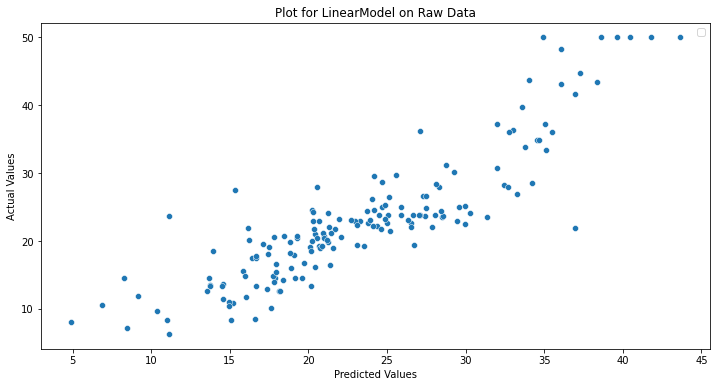


For LinearModel on Transformed Data
Mean Absolute Error:  3.2136731184217204
Mean Squared Error:  18.54944090397271
         Coefficients
CRIM     3.337066e-01
ZN       3.348640e-02
INDUS   -9.906952e-02
CHAS     3.006510e+00
NOX     -6.569663e+00
RM       2.639987e+00
AGE      4.301157e-03
DIS     -7.635837e+00
RAD      1.570470e+00
TAX     -9.497214e+01
PTRATIO -3.601691e-05
B        1.827780e-09
LSTAT   -5.665836e+00


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


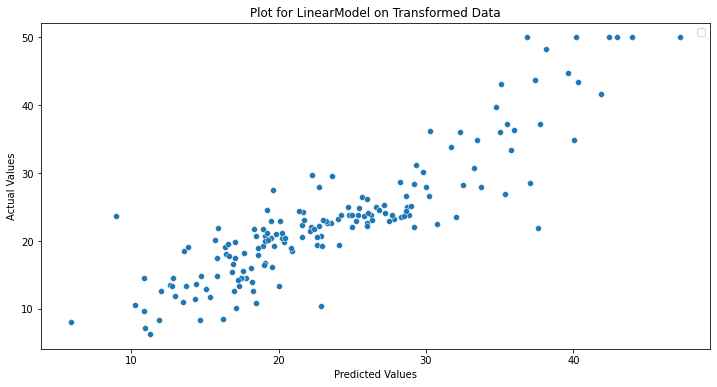


For LinearModel on Scaled Data
Mean Absolute Error:  3.4174722788016623
Mean Squared Error:  20.698475744484387
         Coefficients
CRIM        -0.852426
ZN           1.462752
INDUS        0.497440
CHAS         0.763963
NOX         -2.391873
RM           2.418099
AGE          0.106299
DIS         -3.046632
RAD          2.690538
TAX         -1.961274
PTRATIO     -2.046020
B            0.656689
LSTAT       -3.769379


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


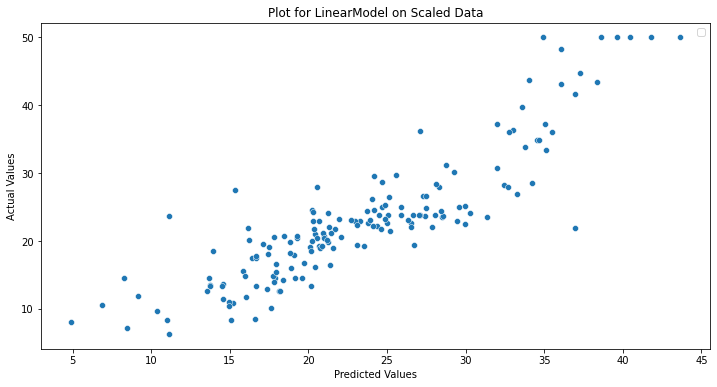


For LinearModel on Transformed and Scaled Data
Mean Absolute Error:  3.2136731184206746
Mean Squared Error:  18.54944090420977
         Coefficients
CRIM         0.768293
ZN           0.780213
INDUS       -0.185875
CHAS         0.762881
NOX         -2.274535
RM           1.853067
AGE          0.482726
DIS         -3.410247
RAD          1.044523
TAX         -1.636945
PTRATIO     -1.231871
B            0.480484
LSTAT       -5.773741


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


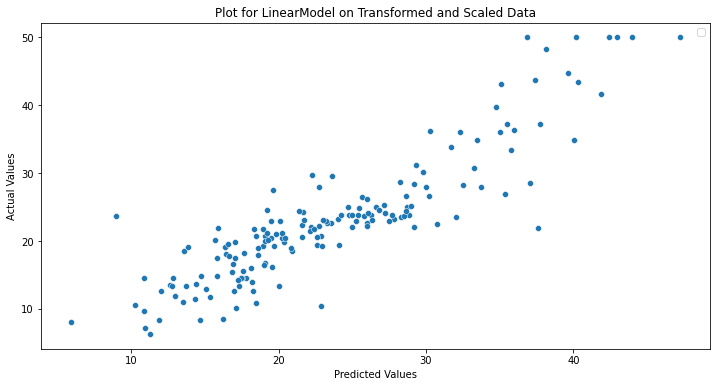

In [565]:
for model_info in models_list:
  see_model_performance(model_info[0],model_info[1],model_info[2],model_info[3])